## Mohsen Hosseini; 98104071

### Importing Libraries

modulereg is a code we wrote for getting all the feature combos and also creating models.

In [5]:
import pandas as pd
import ModuleReg

### Data Preprocess

In [6]:
d= pd.read_excel('HW3.xlsx')
d.columns= ['SampleNo', 'WeeklyTrips', 'VehicleOwnership', 'AnnualIncome', 'FamilyWorkingDays', 'AvgAge']
d= d.drop('SampleNo', axis= 1)
d= d.sample(frac=1, random_state=42)

### Splitting

In [4]:
train_size= 0.7
d_train= d.head(int(len(d)* train_size))
d_test= d.head(-int(len(d)* train_size))


### Getting Combinations

In [10]:
low_limit = 0.2
up_limit = 0.6
data= d
features= ['VehicleOwnership', 'AnnualIncome', 'FamilyWorkingDays', 'AvgAge']
target= 'WeeklyTrips'
combos = ModuleReg.get_valid_feature_combinations(data, features, target, low_limit, up_limit)

print(len(combos))
print(combos)


11
[['VehicleOwnership'], ['AnnualIncome'], ['FamilyWorkingDays'], ['AvgAge'], ['VehicleOwnership', 'AnnualIncome'], ['VehicleOwnership', 'FamilyWorkingDays'], ['VehicleOwnership', 'AvgAge'], ['AnnualIncome', 'AvgAge'], ['FamilyWorkingDays', 'AvgAge'], ['VehicleOwnership', 'AnnualIncome', 'AvgAge'], ['VehicleOwnership', 'FamilyWorkingDays', 'AvgAge']]


### Training

In [11]:
model_results = ModuleReg.train_and_evaluate_models(
            d_train, 
            d_test, 
            target, 
            combos)


c:\Users\sehosseini\Desktop\TrasnportationPlanning\Problems\3\ModuleReg.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
c:\Users\sehosseini\Desktop\TrasnportationPlanning\Problems\3\ModuleReg.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
c:\Users\sehosseini\Desktop\TrasnportationPlanning\Problems\3\ModuleReg.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
c:\Users\sehosseini\Desktop\TrasnportationPlanning\Problems\3\ModuleReg.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
c:\Users\sehosseini\Desktop\Trasnpor

### Analyzing

#### MSE

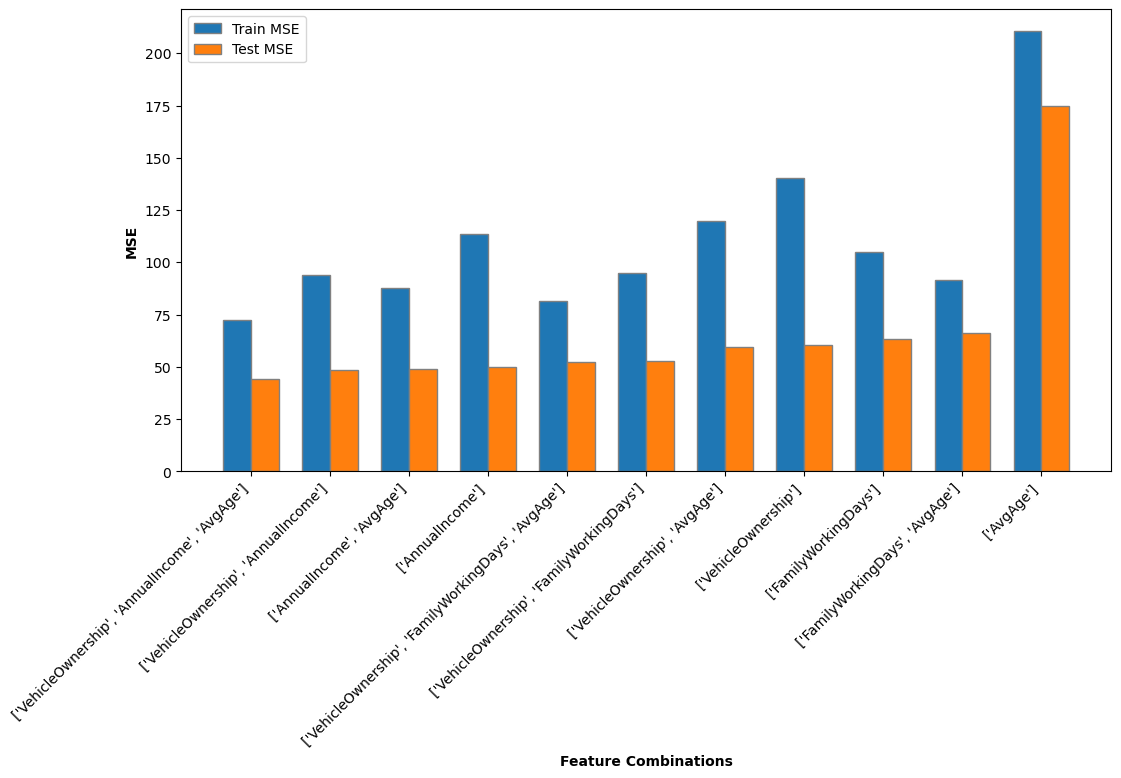

In [12]:
ModuleReg.plot_mse_bar_chart(model_results)

We can see that the combo of [VechileOwnership, AnnualIncome, AvgAge] has the lowest MSE in both the test and train data.

#### R2 Asjusted

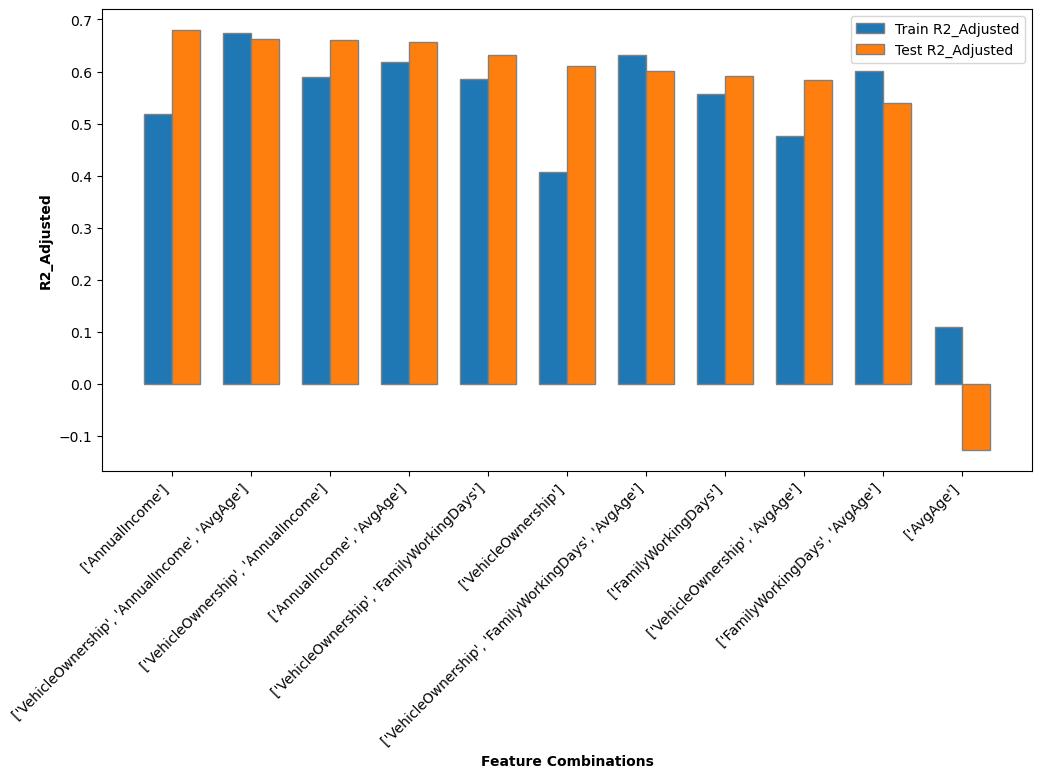

In [13]:
ModuleReg.plot_r2adjusted_bar_chart(model_results)

Using only AnnualIncome gives the best result in the test data, but the training data doesn't show the same improvement. Since linear regression is good at handling overfitting, the high value in the test data might be due to random splitting and isn't very reliable. So, we choose the second combination, similar to the MSE case, as the final set of features for demand modeling.